# [11주차] 정답 없는 데이터와 마주하기: 비지도 학습 🔍

안녕하세요! 11주차 수업에 오신 것을 환영합니다.  
지금까지 우리는 '정답(y)'이 주어진 상태에서 모델을 학습시키는  
**지도 학습(Supervised Learning)** (e.g., 선형/로지스틱 회귀, 결정 트리)을 다루었습니다.

오늘은 머신러닝의 또 다른 큰 축인 **비지도 학습(Unsupervised Learning)** 을 배웁니다.  
비지도 학습은 **정답(레이블)이 없는 데이터**가 주어졌을 때,  
데이터 자체에 내재된 **숨겨진 구조나 패턴**을 찾아내는 방식입니다.

오늘은 비지도 학습의 두 가지 대표적인 기법,  
1. **K-Means 군집화 (Clustering)**: 데이터의 숨겨진 그룹을 찾는 기법  
2. **주성분 분석 (PCA)**: 데이터의 차원을 축소하여 시각화하는 기법  
에 대해 학습하고 `scikit-learn`으로 직접 구현해 보겠습니다.

## 🧺 모듈 1: K-Means 군집화 (Clustering)

**군집화(Clustering)란?**  
- 정답 레이블이 없는 데이터들을 **서로 비슷한 것들끼리** 그룹으로 묶는 작업입니다.  
- **비유**: 여러분에게 빨강, 파랑, 노랑 양말이 마구 섞인 양말 서랍이 주어졌을 때,  
  각 양말에 '빨강'이라는 정답 라벨이 없어도, 여러분은 자연스럽게  
  색깔과 모양이 비슷한 것끼리 세 개의 무더기로 나눌 수 있습니다. 이것이 군집화입니다.

**K-Means 알고리즘의 직관적 이해**:  
- K-Means는 K개의 그룹(Cluster)을 찾는 가장 유명한 알고리즘입니다.
- **작동 원리 (비유: '조별 과제 조장 정하기')**:  
  1.  **초기화**  
  K명의 조장(Centroid)을 무작위로 교실 아무 데나 배치합니다.
  2.  **할당 (Assign)**  
  모든 학생(데이터)이 자신에게 **가장 가까운** 조장과 조를 구성합니다.
  3.  **업데이트 (Update)**  
  각 조장들은 자신에게 모인 조원들의 **정중앙(평균 위치)** 으로 이동합니다.  
  - [**반복**]  
  이제 조장의 위치가 바뀌었으므로, 다시 (2)의 방식으로 조를 재구성합니다.
  - [**수렴**]  
  조장들의 위치가 바뀌지 않을 때 까지(안정화) 2~3단계를 반복합니다.

### K-Means 실습 1: 가상 데이터로 원리 확인

`scikit-learn`을 이용해 K-Means 알고리즘을 직접 적용해 보겠습니다.  
먼저, `make_blobs`라는 함수를 사용해 군집화 연습용 가상 데이터를 생성합니다.

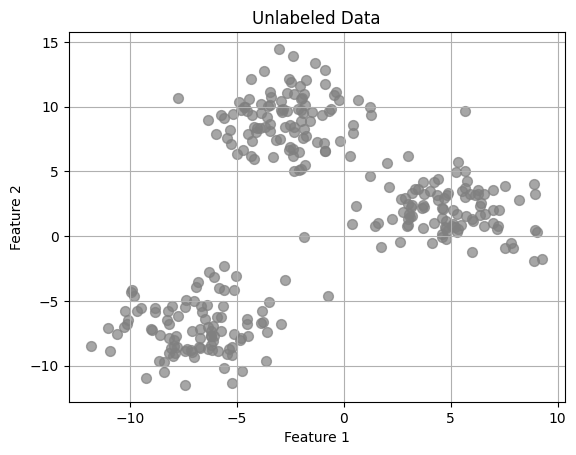

우리의 목표: 이 회색 점들을 3개의 그룹으로 분류하는 것입니다.


In [27]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # 군집화 연습용 데이터 생성기
from sklearn.cluster import KMeans # K-Means 모델
from sklearn.decomposition import PCA # PCA
from sklearn.preprocessing import StandardScaler # 데이터 스케일러
from sklearn.datasets import load_iris # Iris 데이터셋

# 1. 데이터 준비 (정답 없는 데이터 생성)
# n_samples=300: 300개의 샘플 생성
# centers=3: 3개의 그룹(중심)을 가지도록 생성
# cluster_std=2.0: 그룹의 퍼진 정도
# random_state=42: 재현성을 위한 시드 고정
# X는 (300, 2) shape의 2D 데이터, y_true는 실제 정답(0,1,2)
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=2.0, random_state=42)

# 2. 데이터 탐색 (시각화)
# 비지도 학습이므로, 정답(y_true)을 모른다고 가정하고
# 모든 데이터를 회색(c='gray')으로 시각화합니다.
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.7)
plt.title("Unlabeled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

print("우리의 목표: 이 회색 점들을 3개의 그룹으로 분류하는 것입니다.")

### K-Means 실습 2: 모델 학습 및 결과 확인

이제 `KMeans` 모델을 생성하고 학습시킵니다.  
핵심 파라미터는 **`n_clusters`** (K값) 입니다.

In [25]:
# 1. K-Means 모델 생성
# n_clusters=3 : 우리가 찾으려는 그룹의 개수(K)를 3으로 지정
# random_state=42 : 조장의 초기 무작위 위치를 고정
model_kmeans = KMeans(n_clusters=3, random_state=42)

# 2. 모델 학습 (fit)
# 비지도 학습이므로, 정답(y) 없이 X 데이터만 입력합니다!
# 이 과정에서 내부적으로 '할당'과 '업데이트' 단계가 반복됩니다.
model_kmeans.fit(X)

# 3. 학습 결과 확인
# model.labels_ : 모델이 각 데이터에 할당한 그룹 번호(0, 1, 2)
y_pred = model_kmeans.labels_
# model.cluster_centers_ : 학습이 완료된 3개 조장(Centroid)의 최종 위치
centroids = model_kmeans.cluster_centers_

print("K-Means 학습 완료!")
print(f"예측된 그룹 라벨 (앞 10개): {y_pred[:10]}")
print(f"최종 중심점 위치:\n{centroids}")

K-Means 학습 완료!
예측된 그룹 라벨 (앞 10개): [1 1 0 2 1 2 0 2 0 0]
최종 중심점 위치:
[[-2.75726773  9.07285344]
 [-6.88811639 -7.0878587 ]
 [ 4.85432791  2.04801886]]


학습된 모델이 데이터를 어떻게 그룹화했는지,  
`model.labels_`를 이용해 시각화해 봅시다.

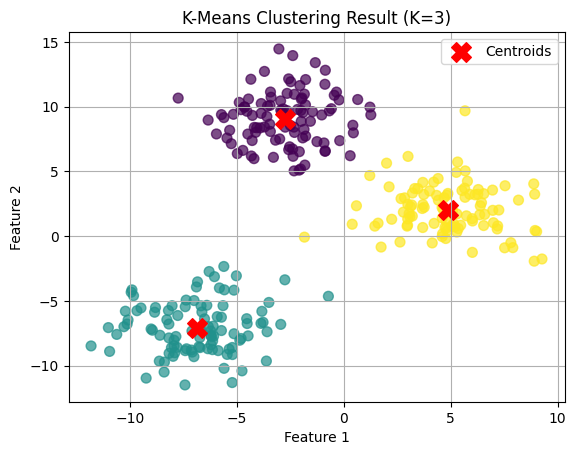

정답(레이블) 없이도 데이터의 분포만으로 그룹을 성공적으로 찾아냈습니다.


In [26]:
# K-Means 군집화 결과 시각화
plt.figure()
# 데이터를 산점도로 그리되, 색상(c)을 모델이 예측한 그룹(y_pred)으로 지정
plt.scatter(X[:, 0], X[:, 1],
            c=y_pred, s=50, cmap='viridis', alpha=0.7)

# 최종 중심점(Centroid)을 빨간색 'x' 마커로 겹쳐 그리기
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering Result (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("정답(레이블) 없이도 데이터의 분포만으로 그룹을 성공적으로 찾아냈습니다.")

## 🧐 모듈 2: 최적의 K값 찾기 (엘보우 메소드)

방금 우리는 정답이 3개인 것을 알고 `n_clusters=3`으로 설정했습니다.  
하지만 실제 비지도 학습 상황에서는 **K값이 몇 개가 적절한지 모릅니다.**

**K값을 어떻게 선택할까요?**  
- **관성 (Inertia)**: 각 데이터 포인트가 자신이 속한 그룹의 중심(Centroid)으로부터  
  얼마나 떨어져 있는지를 나타내는 값입니다. (제곱 거리의 총합)
  - Inertia 값이 **작을수록** 데이터들이 중심에 잘 뭉쳐있다는 의미입니다.
- **Inertia의 특성**:
  - K=1 (그룹 1개): 모든 데이터가 하나의 중심을 공유하므로 Inertia가 **최대**.
  - K=N (데이터 개수만큼): 모든 데이터가 자기 자신이 중심이므로 Inertia는 **0**.   
  (하지만 의미 없음)

**엘보우 메소드 (Elbow Method)**:
- K를 1부터 10까지 늘려가면서, 각 K값에 대한 Inertia를 계산하여 그래프로 그립니다.
- 그래프가 **급격히 꺾이는 지점 (팔꿈치, Elbow)** 이 나타나는데,  
  이 지점이 K를 늘릴 때 얻는 **효율(Inertia 감소)이 급격히 줄어드는 지점**이므로,  
  **최적의 K값 후보**로 간주할 수 있습니다.

K값에 따른 Inertia 계산 완료!


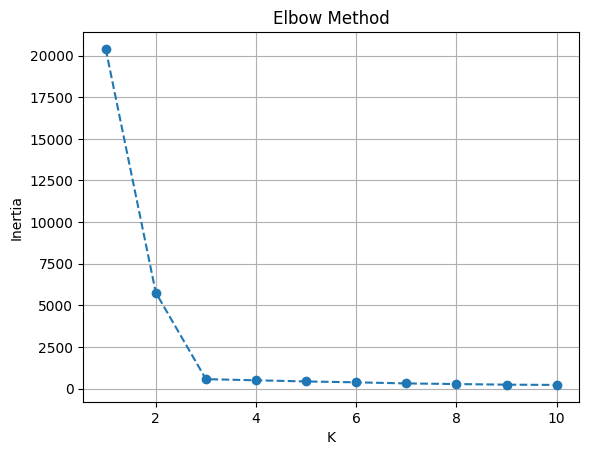

결과 해석:
- K=1에서 2로, 2에서 3으로 갈 때는 Inertia가 급격히 감소합니다.
- K=3에서 4로 갈 때부터는 감소폭이 완만해집니다.
=> 따라서, 이 그래프의 '팔꿈치(Elbow)' 지점은 K=3이며,
   최적의 클러스터 개수는 3개라고 판단할 수 있습니다.


In [13]:
# K값을 1부터 10까지 변화시키며 Inertia를 저장할 리스트
inertia_list = []
k_range = range(1, 11)

for k in k_range:
    # 1. 현재 k값으로 K-Means 모델 생성 및 학습
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    # 2. 학습된 모델의 Inertia 값을 리스트에 추가
    # model.inertia_ 속성에 학습된 Inertia 값이 저장됩니다.
    inertia_list.append(model.inertia_)
print("K값에 따른 Inertia 계산 완료!")

# K값(x축)에 따른 Inertia(y축)를 선 그래프로 시각화
plt.figure()
plt.plot(k_range, inertia_list, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

print("결과 해석:")
print("- K=1에서 2로, 2에서 3으로 갈 때는 Inertia가 급격히 감소합니다.")
print("- K=3에서 4로 갈 때부터는 감소폭이 완만해집니다.")
print("=> 따라서, 이 그래프의 '팔꿈치(Elbow)' 지점은 K=3이며,")
print("   최적의 클러스터 개수는 3개라고 판단할 수 있습니다.")

## 📉 모듈 3: 차원 축소와 PCA

이제 비지도 학습의 두 번째 주제인 **차원 축소(Dimensionality Reduction)** 로 넘어갑니다.

**차원이란?**  
- 데이터가 가진 특징(Feature)의 개수입니다.  
- 붓꽃(Iris) 데이터: 4개의 특징 (sepal length/width, petal length/width)  
-> **4차원 데이터**

**왜 차원을 축소할까요?**
1. **시각화**: 인간은 3차원까지만 인지할 수 있습니다.  
  - 4차원, 100차원 데이터는 시각화가 불가능합니다.
  - 데이터를 2차원이나 3차원으로 압축하면, 데이터의 분포를 눈으로 확인할 수 있습니다.
2.  **차원의 저주 (Curse of Dimensionality)**: 차원이 너무 높아지면(특징이 너무 많으면)  
    데이터가 존재하는 공간은 매우 넓어지는 데 비해 데이터는 희박해져(sparse)  
    오히려 모델의 성능이 저하될 수 있습니다. (e.g., 불필요한 노이즈 특징)

**주성분 분석 (PCA, Principal Component Analysis)**:
- 차원 축소를 위한 가장 대표적인 기법입니다.
- **핵심 아이디어**: 데이터가 가장 **널리 퍼져있는(분산이 큰)** 방향을  
  새로운 **'축(주성분, Principal Component)'** 으로 찾고,  
  원본 데이터를 이 새로운 축에 **사영(projection)** 시켜 차원을 줄입니다.
- **비유**: 3D 물체(e.g., 손)를 2D로 표현할 때, 손바닥 정면에서 빛을 쏴서  
  손의 모양이 가장 잘 드러나는 **그림자(Shadow)** 를 찾는 것과 같습니다.

### [중요] PCA를 위한 데이터 전처리: 스케일링

PCA는 데이터의 **분산(Variance)** 을 기반으로 작동합니다.  
만약 특징(열)마다 측정 단위(scale)가 다르면 (e.g., 키(150\~190) vs. 몸무게(40\~100)),  
분산이 큰 '키' 특징이 PCA에 과도하게 큰 영향을 미치게 됩니다.

따라서 PCA를 수행하기 전에는, 모든 특징의 중요도를 동등하게 만들기 위해  
**표준화 스케일링(Standard Scaling)** 을 통해 모든 특징의 **평균을 0, 분산을 1**로  
맞춰주는 전처리 과정이 **반드시** 필요합니다.

`scikit-learn`의 **`StandardScaler`** 를 사용합니다.

In [14]:
# 1. 붓꽃(Iris) 데이터 로드
iris = load_iris()
# 4개의 특징(4D)을 모두 사용
X_iris = iris.data
y_iris = iris.target

print(f"원본 데이터 Shape: {X_iris.shape}")

# 2. StandardScaler를 이용한 데이터 스케일링
# StandardScaler 객체 생성
scaler = StandardScaler()

# scaler가 데이터의 평균과 표준편차를 학습(fit)하고,
# 그 기준으로 데이터를 변환(transform)하도록 한 번에 수행
X_scaled = scaler.fit_transform(X_iris)

print(f"\n스케일링 후 데이터 (앞 5줄):\n{np.round(X_scaled[:5], 2)}")
print(f"\n스케일링 후 전체 평균 (≈0): {X_scaled.mean():.4f}")
print(f"스케일링 후 전체 표준편차 (≈1): {X_scaled.std():.4f}")

원본 데이터 Shape: (150, 4)

스케일링 후 데이터 (앞 5줄):
[[-0.9   1.02 -1.34 -1.32]
 [-1.14 -0.13 -1.34 -1.32]
 [-1.39  0.33 -1.4  -1.32]
 [-1.51  0.1  -1.28 -1.32]
 [-1.02  1.25 -1.34 -1.32]]

스케일링 후 전체 평균 (≈0): -0.0000
스케일링 후 전체 표준편차 (≈1): 1.0000


### PCA 실습 1: 4D → 2D로 차원 축소

이제 스케일링된 4차원 붓꽃 데이터를  
`PCA`를 이용해 2차원으로 축소해 보겠습니다.

In [15]:
# 1. PCA 모델 생성
# n_components=2 : 4개의 특징을 2개의 주성분(2D)으로 압축하겠다고 설정
pca = PCA(n_components=2)

# 2. PCA 모델 학습(fit) 및 데이터 변환(transform)
# 스케일링된 4D 데이터(X_scaled)를 입력받아
# 2D 주성분 공간으로 변환된 데이터(X_pca)를 반환
X_pca = pca.fit_transform(X_scaled)

print("PCA 변환 완료!")
print(f"원본 데이터 Shape: {X_scaled.shape}")
print(f"PCA 변환 후 Shape: {X_pca.shape}")

PCA 변환 완료!
원본 데이터 Shape: (150, 4)
PCA 변환 후 Shape: (150, 2)


### PCA 실습 2: 결과 해석

PCA로 차원을 축소하면 **정보 손실**이 발생합니다.  
얼마나 많은 정보가 보존되었는지 확인하는 것이 중요합니다.

**`explained_variance_ratio_`**:  
- PCA 모델이 찾은 각 주성분(PC1, PC2, ...)이  
  원본 데이터의 분산(정보량)을 **몇 퍼센트나 설명하는지** 알려줍니다.

In [21]:
# PCA의 '설명된 분산' 비율 확인
variance_ratio = pca.explained_variance_ratio_

print(f"설명된 분산 비율 (PC1, PC2): {variance_ratio}")

# 두 주성분이 설명하는 총 분산(정보량)
total_variance = np.sum(variance_ratio)
print(f"\n총 분산 비율: {total_variance * 100:.2f}%")

print("\n=> 4차원 데이터를 2차원으로 압축했지만,")
print(f"   약 {total_variance * 100:.2f}%를 보존하고 있습니다!")

설명된 분산 비율 (PC1, PC2): [0.72962445 0.22850762]

총 분산 비율: 95.81%

=> 4차원 데이터를 2차원으로 압축했지만,
   약 95.81%를 보존하고 있습니다!


### PCA 실습 3: 2D 시각화

이제 PCA로 변환된 2차원 데이터(`X_pca`)를 산점도로 그려봅시다.  
이때, 점의 색상을 **원본 붓꽃 품종(y_iris)** 으로 지정하여,  
2차원 공간에서도 품종 구분이 잘 되는지 확인합니다.

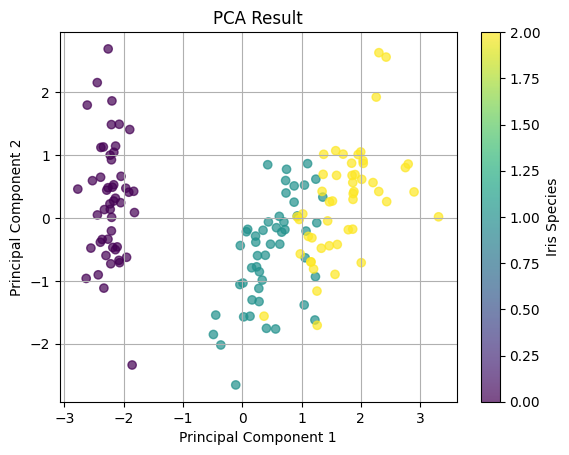

결과 해석:
- 데이터의 분포가 2차원 평면에도 꽤 잘 나타납니다.
- 각 붓꽃 품종(색깔)이 2차원 공간에서도 뚜렷하게 구분되는 것을 볼 수 있습니다.
=> PCA가 데이터의 핵심 구조를 잘 보존하며 차원을 축소했음을 의미합니다.


In [23]:
# PCA로 변환된 2D 데이터 시각화
plt.figure()

# X_pca의 0번 열을 x축, 1번 열을 y축으로 사용
# 색상(c)은 원본 데이터의 정답(y_iris)을 사용
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_iris, cmap='viridis', alpha=0.7)

plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Iris Species')
plt.grid(True)
plt.show()

print("결과 해석:")
print("- 데이터의 분포가 2차원 평면에도 꽤 잘 나타납니다.")
print("- 각 붓꽃 품종(색깔)이 2차원 공간에서도",
      "뚜렷하게 구분되는 것을 볼 수 있습니다.")
print("=> PCA가 데이터의 핵심 구조를 잘 보존하며",
      "차원을 축소했음을 의미합니다.")

## ✨ 마무리

오늘은 **정답 없는 데이터**를 다루는 **비지도 학습**을 배웠습니다.

- **K-Means Clustering**: 데이터의 숨겨진 그룹을 찾는 기법.  
  - '할당'과 '업데이트'를 반복하며 최적의 **중심(Centroid)** 을 찾습니다.
  - **엘보우 메소드**를 이용해 최적의 K값을 추정할 수 있습니다.

- **PCA (주성분 분석)**: 고차원 데이터의 차원을 축소하는 기법.  
  - 데이터의 **분산을 최대화**하는 새로운 축(주성분)을 찾습니다.
  - 반드시 **스케일링**을 선행해야 하며,  
  **`explained_variance_ratio_`** 로 정보 보존량을 확인합니다.
  - 고차원 데이터의 **시각화**에 매우 유용하게 사용됩니다.

다음 시간에는 지금까지 배운 모델들의 기초가 되는 **MLP(다층 퍼셉트론)**,  
즉 **딥러닝**의 기본 모델을 실습해 보겠습니다.

```

































```



































